***
# DSCI 100: Group Project
## Generating a Regression Model for Secondary Student's Alcohol Consumption 

#### **Section 006 - Group 6**
#### Authors: Duncan Harrop, Julia Sangster, Charisse Webb, Janelle Xie
***

***
## **Introduction**
***

* Relevant background

**Question**: Can we accurately predict a student's level of alcohol consumption  based only on data of their average grade, the number of past failures, the number of absences, the age of the student and sex of the student. 





**Response Variable**: Total alcohol consumption Dalc + Walc
* Describe dataset



| Variable | Coded Name | Possible Values | Descrition of Values |
|---|---|---|---|
| School | school | GP, MS | |
| Sex | sex | F, M | |
| Age | age | 15 - 22 | |
| Address | address | U, R | |
| Family Size | famsize | LE3, GT3 | |
| Parental Status | Pstatus | T, A | |
| Mother's Education | Medu | 0 - 4 | |
| Father's Education  | Fedu | 0 - 4 | |
| Mother's Job | Mjob | teacher, health, services, at_home, other | |
| Father's Job | Fjob | teacher, health, services, at_home, other | |
| Reason for Attending School | reason | home, reputation, course, other | |
| Student's Guardian | guardian | mother, father, other | |
| Commuting Time | traveltime | 1 - 4 | |
| Studying Time | studytime | 1 - 4 | |
| Number of Previous Class Failures | failures | 1 - 4 | |
| Extra Educational Support | schoolsup | yes, no | |
| Family Educational Support | famsup | yes, no | |
| Extra Paid Classes for Course Subject | paid | yes, no | |
| Does Extra-Curricular Activities | activities | yes, no | |
| Went to Nursery School | nursery | yes, no | |
| Wants to Take Higher Education | higher | yes, no | |
| Has Internet Access at Home | internet | yes, no | |
| Has a Romantic Relationship | romantic | yes, no | |
| Quality of Family Relationships | famrel | 1 - 5 | |
| Free Time After School | freetime | 1 - 5 | |
| Time Spent Going Out With Friends | goout | 1 - 5 | |
| Workday Alcohol Consumption | Dalc | 1 - 5 | |
| Weekend Alcohol Consumption | Walc | 1 - 5 | |
| Current Health Status | health | 1 - 5 | |
| Absences from School | absences | 0 - 93 | |
| Grade - Period 1 | G1 | 0 - 20 | |
| Grade - Period 2 | G2 | 0 - 20 | |
| Grade - Final Grade | G3 | 0 - 20  | |

***

***
## **Preliminary Exploratory Data Analysis**
***

 * Summarize training data 
* Summarize plot relevant to analysis

Do response variable vs. predictor variables in scatter-plots

Use RMSPE to determine if it matches or not - squared difference 

#### Loading Libraries

Our project makes use of analysis tools in various R packages, including tidyverse. The coding cell below loads these packages and does other small tasks for setting up data analysis.

In [1]:
## NOTE: Uncomment these lines if you do not have tidyverse, repr or tidymodels package installed

## install.packages("tidyverse")
## install.packages("repr")
## install.packages("tidymodels")

## The following lines load all relevant packages for analysis
suppressPackageStartupMessages({
library(tidyverse)
library(repr)
library(tidymodels)})

## Reducing default table output size 
options(repr.matrix.max.rows = 6)
    
## Setting the RNG seed for analysis
set.seed(9999)

theme_set(theme_bw())

#### Reading Data from Web Repository

The data to be analyzed was sourced from Kaggle [ADD SOURCE]. Due to it being present in a compressed file, the source data was transferred to a public GitHub repository. The cell below downloads the data file as a comma-separated values (CSV) file into the users working directory, and then loads the data into the current R kernel. 

In [2]:
## Note: Data was stored in .zip file so download.file() was not working from Kaggle
## This change was approved March-02-2022 by TA Shruti

suppressWarnings({
    
    ## Downloading file from GitHub repository
    download.file("https://raw.githubusercontent.com/juliasangster/DSCI_Project/main/data/student-mat.csv", destfile = "student-mat.csv")
    
    ## Reading the downlaoded file into the working directory
    student_alcohol_consumption_raw <- read_csv("student-mat.csv", col_types = cols())
    
    ## Displaying a part of the loaded data
    student_alcohol_consumption_raw
    })

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,21,R,GT3,T,1,1,other,other,⋯,5,5,3,3,3,3,3,10,8,7
MS,M,18,R,LE3,T,3,2,services,other,⋯,4,4,1,3,4,5,0,11,12,10
MS,M,19,U,LE3,T,1,1,other,at_home,⋯,3,2,3,3,3,5,5,8,9,9


#### Cleaning/Wrangling Data:

Our data came in a tidy format, with each column, row, and value representing a single variable, observation, and value, respectively.

In the cell below, we demonstrate that this data set does not contain numeric NA values.
This is shown by filtering across all varaibles of numeric-type for observations containing any NA values. As the resulting data-frame (data_na) is empty, this shows our data is processed for NA values. 

In [3]:
number_observations_total <- nrow(student_alcohol_consumption_raw)

data_na <- student_alcohol_consumption_raw |>
    filter_if(is.numeric, any_vars(is.na(.)))

number_rows_containing_na <- nrow(data_na)

if(is.null(data_na)) {
    number_rows_containing_na = 0}


print("The total number of rows is:")
print(number_observations_total)
print("The number of rows containing NA values is:")
print(number_rows_containing_na)


[1] "The total number of rows is:"
[1] 395
[1] "The number of rows containing NA values is:"
[1] 0


In [4]:
## Select relevant columns for analysis
student_alcohol_consumption <- student_alcohol_consumption_raw |>
    select(sex, age, failures, Dalc, Walc, absences, G1, G2, G3)

The question posed is interested in only the total level of alcohol consumption, and does not care about if the alcohol consumption is on the weekend or weekday. To account for this, a new column named "Talc" was generated. Talc represents the total weekly alcohol consumption of a student, and is on a scale of 2 - 10, with 2 representing the lowest alcohol consumption and 10 representing the highest alcohol consumption.

The new column will be calculated based on the formula below: 

$TAlc = DAlc + WAlc$

This transfomation of the data was conducted in the cell below.

In [91]:
## Convert weekend and weekday alcohol consumption to weekly total alcohol consumption
## NOTE: Columns representing intermediate values (Dalc, Walc) will be selected away later to ensure 1 cell per value 
student_alcohol_consumption <- student_alcohol_consumption |>
    mutate(Talc = Dalc + Walc)

## The table at this stage can be displayed by uncommenting the line below 
## student_alcohol_consumption

Similarly, grades were assessed at three different stages of the school-year in assessments named G1, G2, and G3. Due to these all being measures of academic success, it was explored if G1, G2, and G3 were correlated. To do so, the following scatter-plots comparing assessment grades to the average of the three grades were generated. Note that the size of the point on these scatter plots is proportional to the count at that point. 

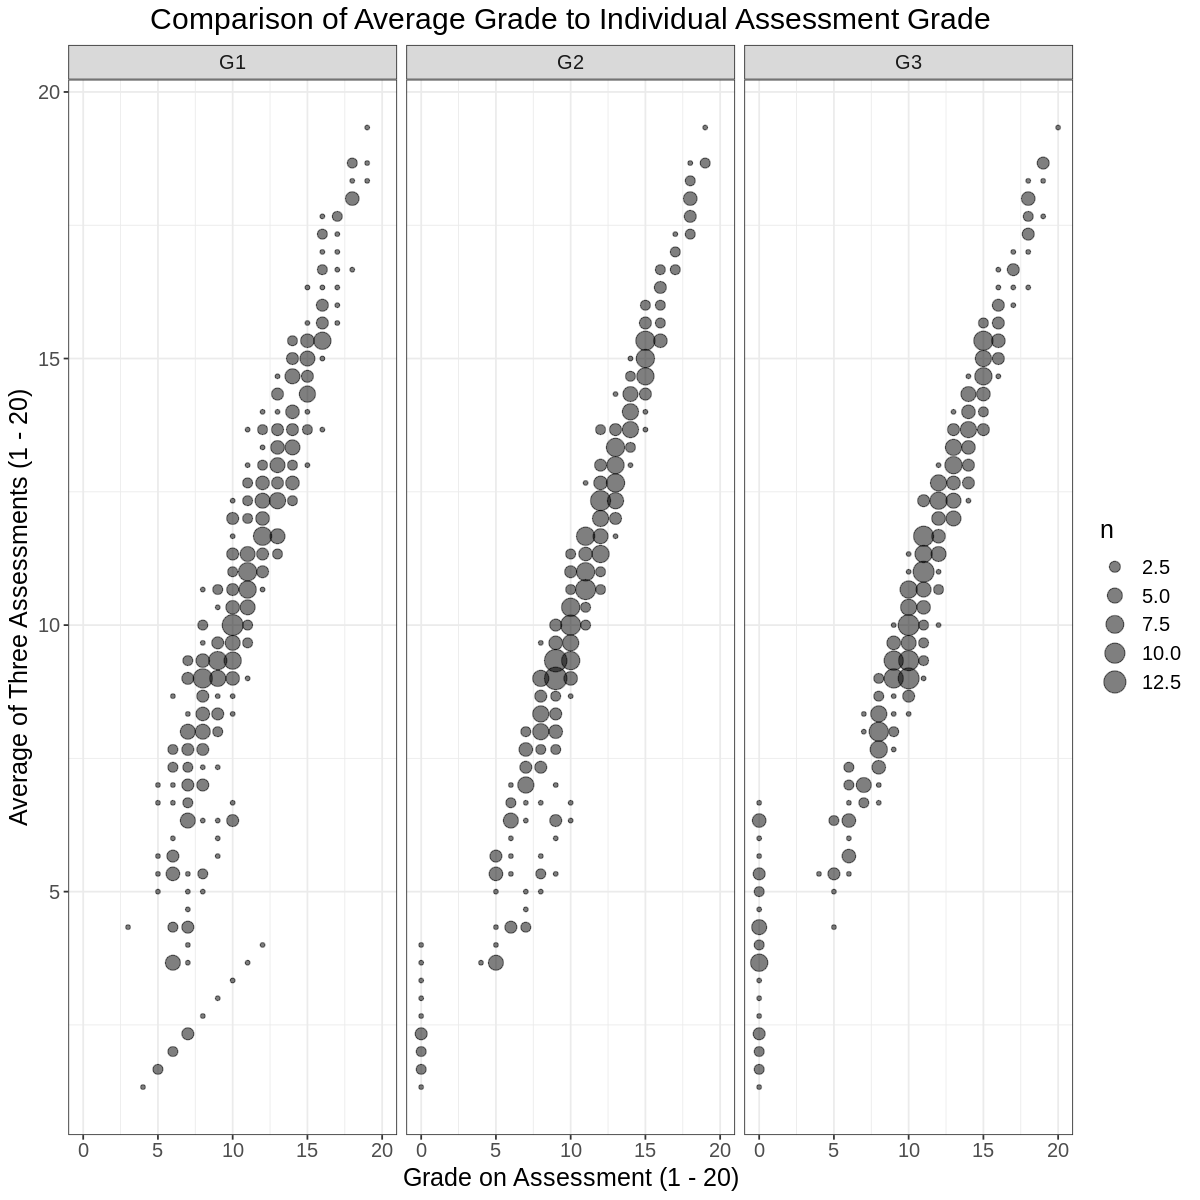

In [92]:
grades_data <- student_alcohol_consumption |>
    select(G1, G2, G3, AvgG) |>
    pivot_longer(cols = G1:G3,
                names_to = "assessment",
                values_to = "grade")

options(repr.plot.width = 10, repr.plot.height = 10) 

grades_plot <- grades_data |>
    ggplot(aes(x=grade, y = AvgG)) +
    geom_count(alpha = 0.5) +
    facet_grid(cols = vars(assessment)) +
    xlab("Grade on Assessment (1 - 20)") +
    ylab("Average of Three Assessments (1 - 20)") +
    ggtitle("Comparison of Average Grade to Individual Assessment Grade") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size = 15))

grades_plot

The strong positive relationship demonstrated on these graphs indicates that G1, G2, and G3 are correlated in some way. For this reason, it was selected to use the **average** of grade assessments as a predicting variable, instead of indivudal grades on assessments. The averaging of this variable is done in the cell below.

In [95]:
## Convert individual grade assessments to average grade assessment
## NOTE: Columns representing intermediate values (G1, G2, G3) will be selected away later to ensure 1 cell per value 
student_alcohol_consumption <- student_alcohol_consumption |>
    mutate(AvgG = (G1 + G2 + G3)/3)

## The table at this stage can be displayed by uncommenting the line below 
## student_alcohol_consumption

Now that the values of total weekly alcohol consumption (Talc) and average grade (AvgG) have been calculated, only the columns we will use in our analysis will be selected to be in our final data frame. The cell below does this step and calculated the total number of observations in the complete data set, which is 395. 

In [8]:
student_alcohol_consumption_clean <- student_alcohol_consumption |>
    select(-Dalc, - Walc, -G1, -G2, -G3)

count_observations <- nrow(student_alcohol_consumption_clean) 

print("The clean data set has this many observations:")
print(count_observations)

[1] "The clean data set has this many observations:"
[1] 395


Our analysis attempts to judge the accuracy of our engine, and there are no means to obtain more data. As a result, our data will be split into training and testing data sets. The training data will only be used for building the model, and testing data will only be used for assessing the accuracy of the model. This initial split is in the cell below.

In [96]:
## Splitting data into testing/training data frames
sac_split <- initial_split(student_alcohol_consumption_clean, 
                            prop = 0.75,
                            strata = Talc)

## Grabbing the training set in a single data frame
sac_train <- training(sac_split)

## Grabbing the testing set in a single data frame
sac_test  <- testing(sac_split)

## If you would like to see the indivdual training/testing sets, please uncomment the lines below 
## sac_train
## sac_test

Our tidy data set to be used for training our model has now been fully wrangled and clean. The next section focusses on describing the training data.

## Summarizing and Visualizing Training Data 

In the regression analysis to be conducted, the predictor variables will be:
1. Student's Age
2. Student's Sex
3. Failures (n if $n \in [0,3]$, else 4)
4. Absences (0 - 93)
5. Grades - Average of First Period, Second Period, Final Grades (G1 + G2 + G3 / 3)

The response variable will be the student's total weekly alcohol consumption. 

##### Investigating Total Weekly Alcohol Consumption in Training Data

A distribution of total weekly alcohol consumption in the training data set can be seen below.

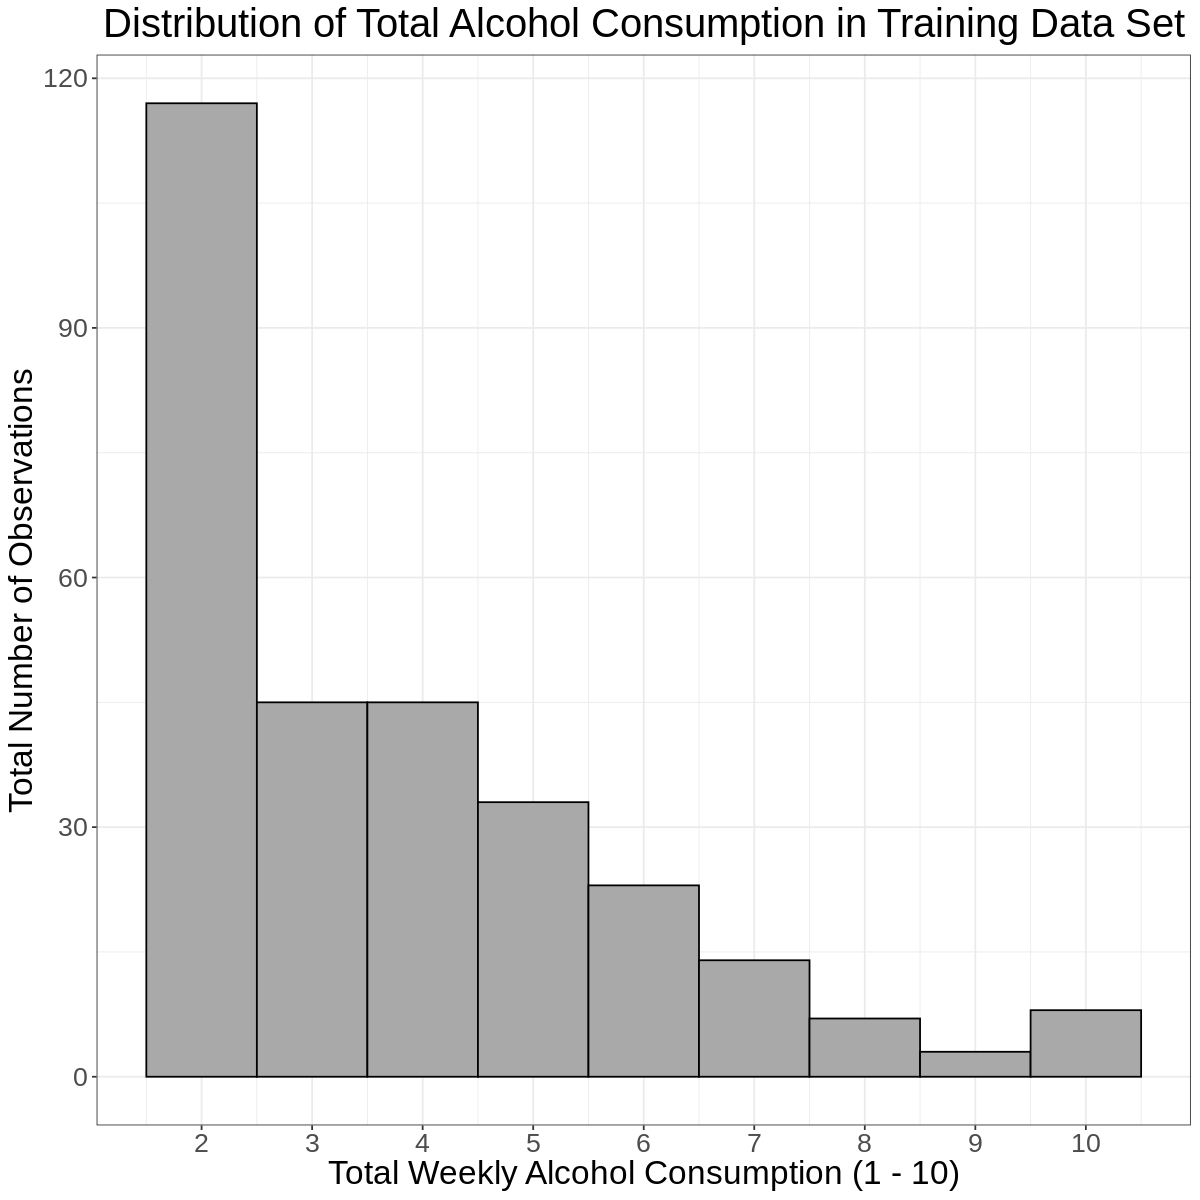

In [102]:
alcohol_consump_data <- sac_train |>
    select(Talc) 

options(repr.plot.width = 10, repr.plot.height = 10) 

alcohol_consump_plot <- alcohol_consump_data |>
    ggplot(aes(x = Talc)) +
    geom_histogram(bins = 10, binwidth = 1, color = "black", fill = "darkgrey",
                   boundary= -0.5) +
    xlab("Total Weekly Alcohol Consumption (1 - 10)") +
    ylab("Total Number of Observations") +
    ggtitle("Distribution of Total Alcohol Consumption in Training Data Set") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size = 20)) +
    scale_x_continuous(breaks = 1:10)

alcohol_consump_plot

##### Sex Distribution 

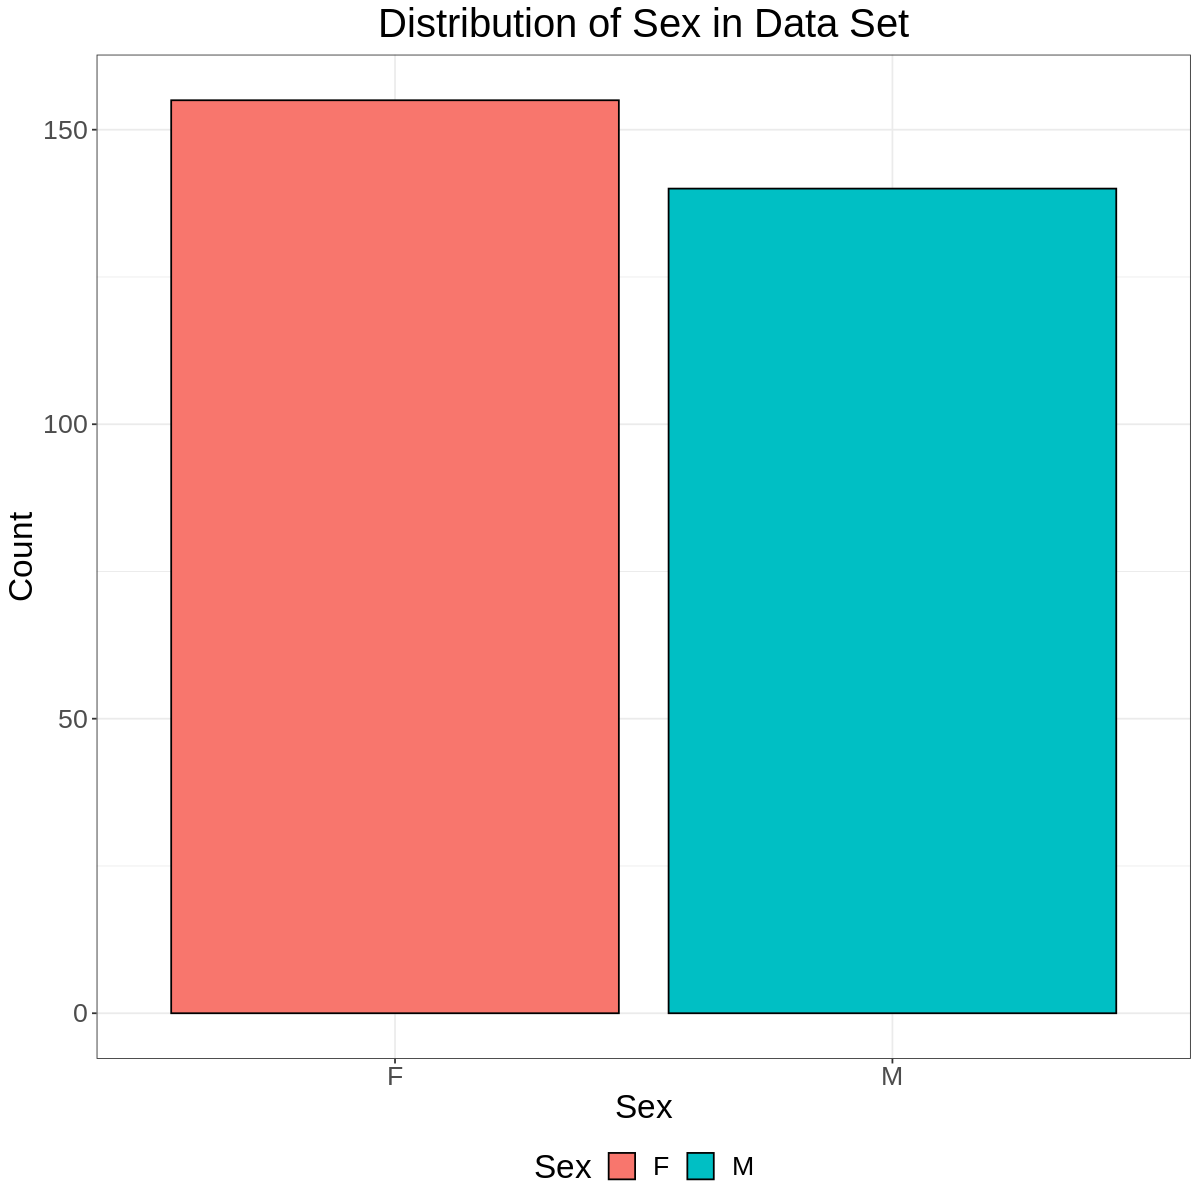

In [57]:
sac_train_sex <- sac_train |>
    select(sex) |>
    group_by(sex) |>
    summarize(count = n())

## Code for plot: 
options(repr.plot.width = 10, repr.plot.height = 10) 
sac_train_sex_bar_chart_no_Talc <- sac_train_sex |>
     ggplot(aes(x = sex, y = count, fill = sex)) + 
     geom_bar(stat = "identity",
             color = "black") +
     labs(x = "Sex",
          y = "Count",
          title = "Distribution of Sex in Data Set",
          fill = "Sex") +
     theme(plot.title = element_text(hjust = 0.5),
           text = element_text(size = 20),
           legend.position = "bottom")

sac_train_sex_bar_chart_no_Talc

`summarise()` has grouped output by 'Talc'. You can override using the
`.groups` argument.


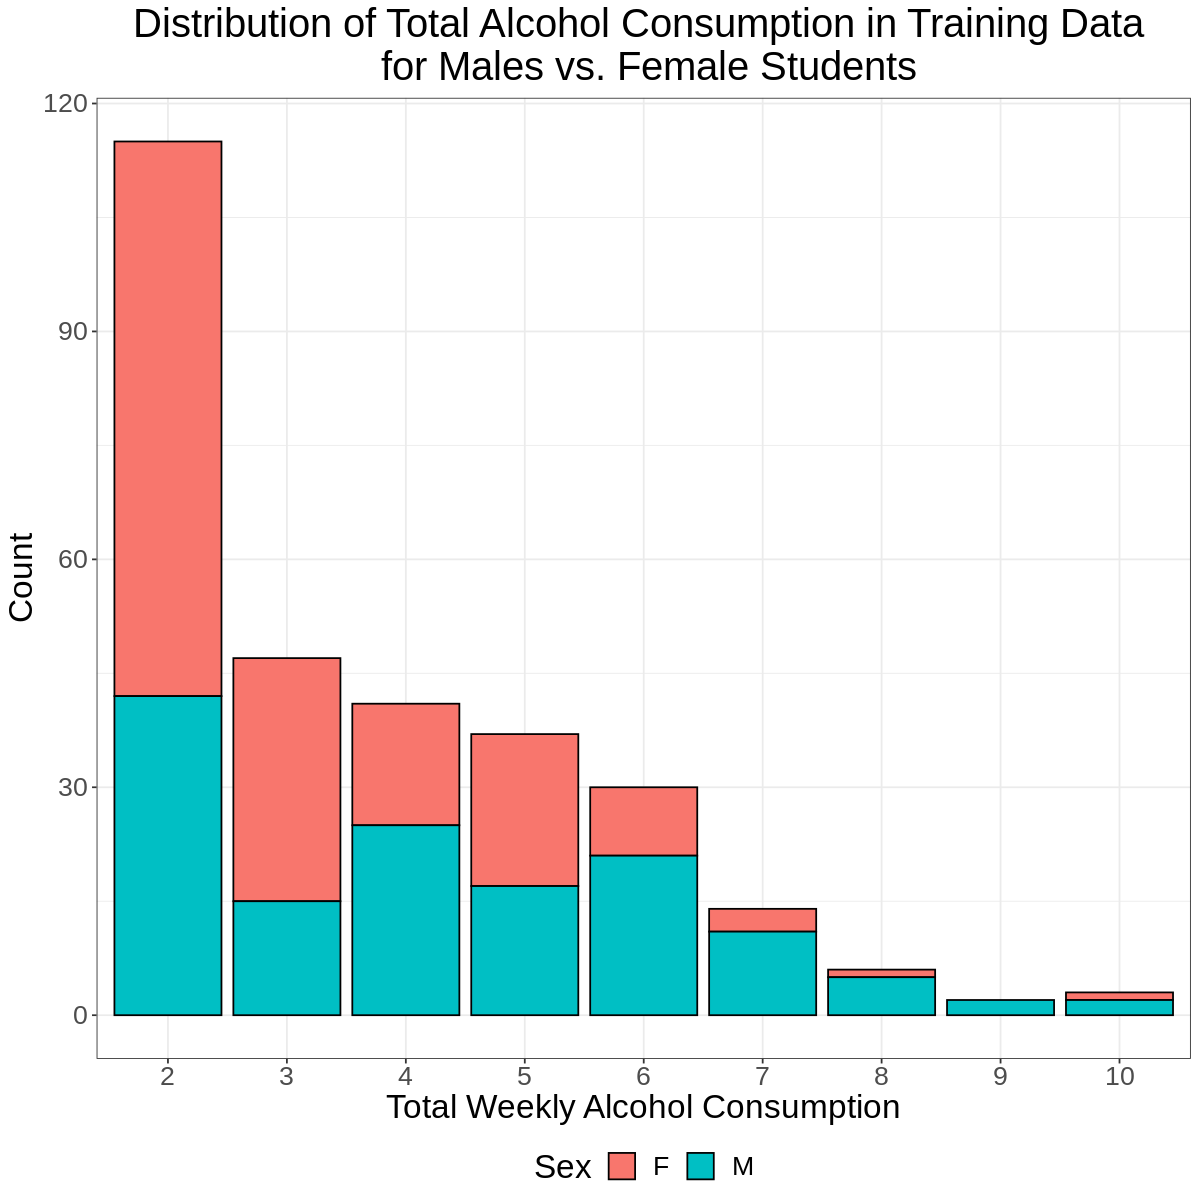

In [58]:
sac_train_sex_bar_chart_data <- sac_train |>
    select(Talc, sex) |>
    group_by(Talc, sex) |>
    summarize(count = n()) |>
    ungroup() 

## Conversion of Talc from dbl -> fct to make displaying via ggplot easier
sac_train_sex_bar_chart_data$Talc <- as.factor(sac_train_sex_bar_chart_data$Talc)


## Code for plot: 
options(repr.plot.width = 10, repr.plot.height = 10) 
sac_train_sex_bar_chart <- sac_train_sex_bar_chart_data |>
     ggplot(aes(x = Talc, y = count, fill = sex)) + 
     geom_bar(stat = "identity",
             color = "black") +
     labs(x = "Total Weekly Alcohol Consumption",
          y = "Count",
          title = "Distribution of Total Alcohol Consumption in Training Data \n for Males vs. Female Students",
          fill = "Sex") +
     theme(plot.title = element_text(hjust = 0.5),
           text = element_text(size = 20),
           legend.position = "bottom")

sac_train_sex_bar_chart

##### Age Distribution

In [84]:
sac_train_age_bar_chart_data <- sac_train |>
    select(Talc, age) |>
    group_by(Talc, age) |>
    summarize(count = n()) |>
    ungroup() 

## Conversion of Talc from dbl -> fct to make displaying via ggplot easier
sac_train_age_bar_chart_data$Talc <- as.factor(sac_train_age_bar_chart_data$Talc)
sac_train_age_bar_chart_data$age <- as.factor(sac_train_age_bar_chart_data$age)

options(repr.plot.width = 10, repr.plot.height = 10) 
sac_train_age_bar_chart_1 <- sac_train_age_bar_chart_data |>
     ggplot(aes(x = age, y = count, fill = Talc)) + 
     geom_violin(scale = Talc) +
     labs(x = "Age-Group",
          y = "Proportion of Age-Group",
          title = "Total Alcohol Consumption for Individual Age-Groups",
          fill = "Total Alcohol Consumption") +
     theme(plot.title = element_text(hjust = 0.5),
           text = element_text(size = 20),
           legend.position = "bottom")

sac_train_age_bar_chart_1

`summarise()` has grouped output by 'Talc'. You can override using the
`.groups` argument.


ERROR: Error in layer(data = data, mapping = mapping, stat = stat, geom = GeomViolin, : object 'Talc' not found


##### Absences Distribution 

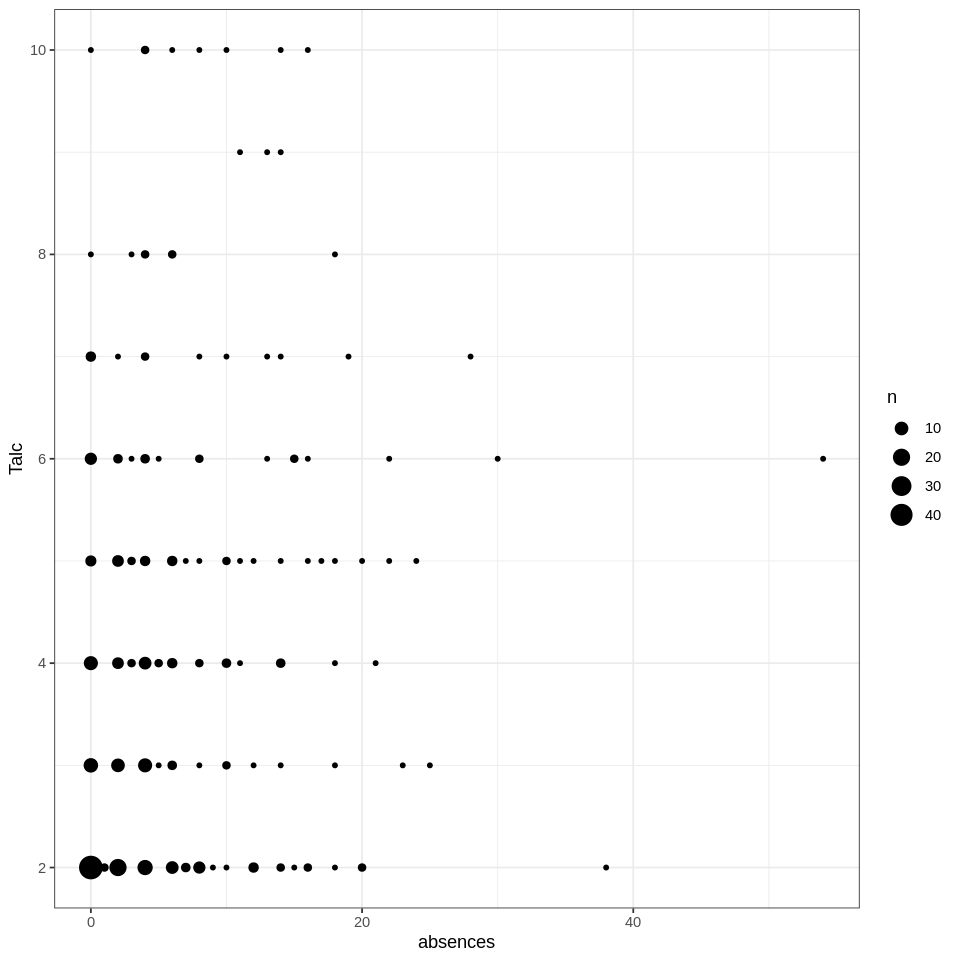

In [87]:
sac_train_absences_scatter_data <- sac_train |>
    select(Talc, absences) 

plot1<- sac_train_absences_scatter_data |>
    ggplot(aes(x=absences, y = Talc)) +
    geom_count()

plot1

##### Failures Distribution

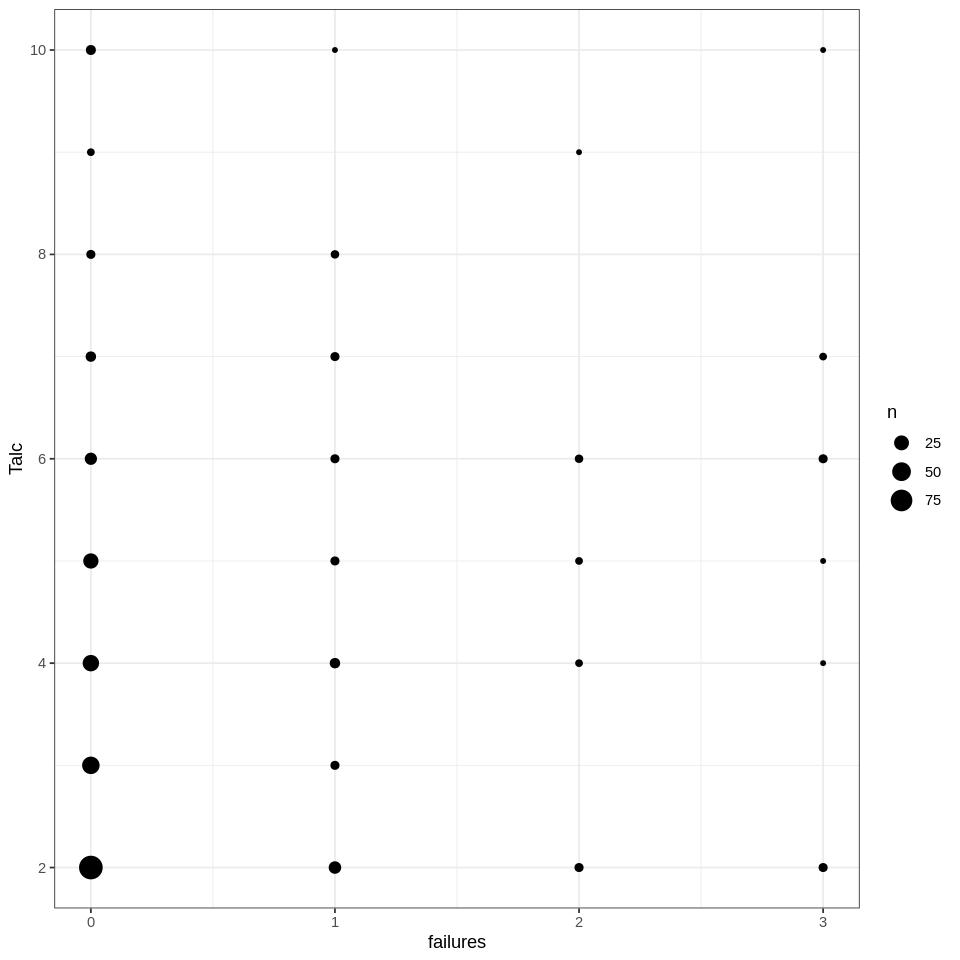

In [88]:
sac_train_failures_scatter_data <- sac_train |>
    select(Talc, failures) 

plot2<- sac_train_failures_scatter_data |>
    ggplot(aes(x=failures, y = Talc)) +
    geom_count()

plot2


##### Grades Distribution 


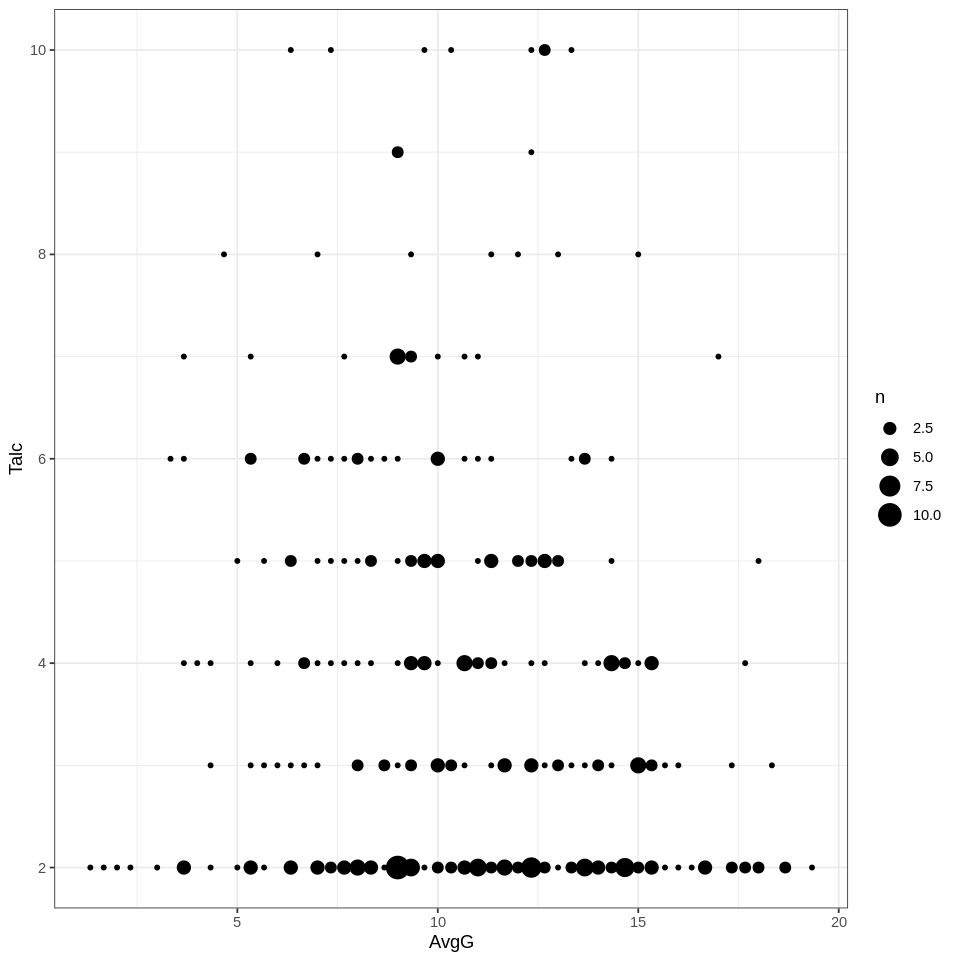

In [89]:
sac_train_avg_grades_scatter_data <- sac_train |>
    select(Talc, AvgG) 

plot3<- sac_train_avg_grades_scatter_data |>
    ggplot(aes(x=AvgG, y = Talc)) +
    geom_count()

plot3

***
## **Methods**
***

* Explain data analysis and what varaibles you will use
* Explain meaning of variables - all or predictive?
* Explain visualization you will complete


KNN variables 

***
## **Expected Outcomes and Significance**
***

1. What do we expect to find? 
2. What impact do these findings have?
3. What future questions could this lead to?

In [ ]:
Use cross validation to evaluate different parameter choices 
* different values of K - choose K that gives lower RMSPE

Use RMSPE to determine if it matches or not - squared difference